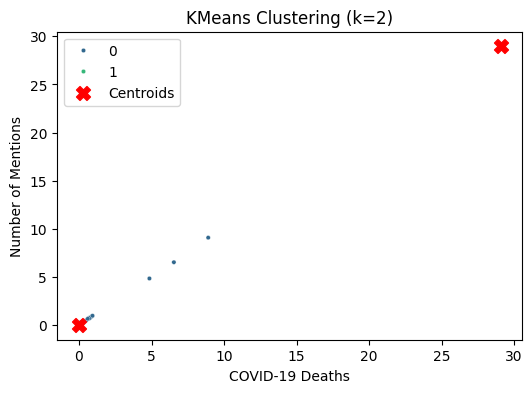

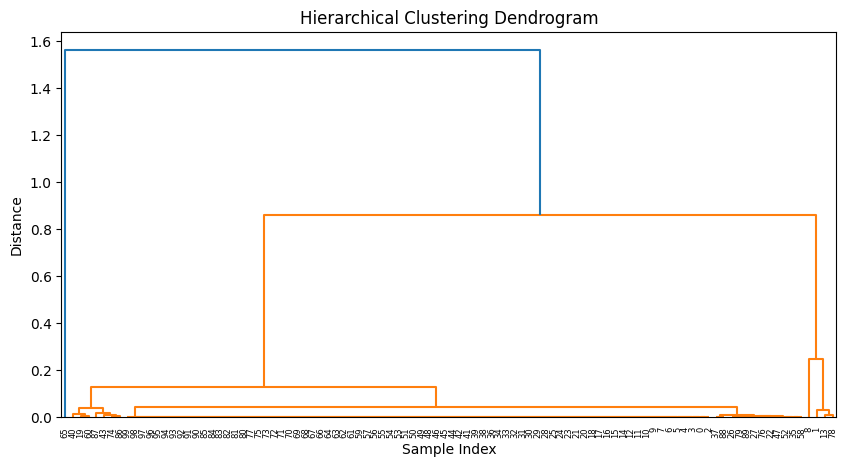

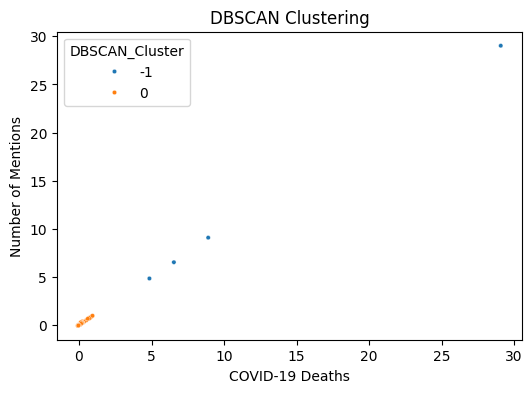

KMeans Cluster Counts:
KMeans_Cluster
0    999
1      1
Name: count, dtype: int64

DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    996
-1      4
Name: count, dtype: int64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("fixed.csv")

# Check and clean column names
df.columns = df.columns.str.strip()

# Define label column and numerical columns
label_column = "Condition Group"  # Change if needed
numerical_cols = ["COVID-19 Deaths", "Number of Mentions"]

# Remove rows with missing values in numerical columns
df = df.dropna(subset=numerical_cols)

# Sample data for faster processing (adjust sample size as needed)
df = df.sample(n=min(1000, len(df)), random_state=42)

# Separate labels
labels = df[label_column]
df_numeric = df[numerical_cols]

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# KMeans Clustering with silhouette method
sil_scores = []
k_values = [2, 3, 4]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, clusters)
    sil_scores.append(score)

# Choose best k and fit KMeans
best_k = k_values[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

# Plot KMeans Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["KMeans_Cluster"], palette="viridis", s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.legend()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Number of Mentions")
plt.title(f"KMeans Clustering (k={best_k})")
plt.show()

# Hierarchical Clustering (Dendrogram, limiting to 100 samples for speed)
sample_df = df_scaled[:100]
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(sample_df, method='ward')
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# DBSCAN Clustering with optimized parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

# Plot DBSCAN Results
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["DBSCAN_Cluster"], palette="tab10", s=10)
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Number of Mentions")
plt.title("DBSCAN Clustering")
plt.show()

# Summary of Clusters
print("KMeans Cluster Counts:")
print(df["KMeans_Cluster"].value_counts())
print("\nDBSCAN Cluster Counts:")
print(df["DBSCAN_Cluster"].value_counts())
